In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
logging.getLogger().setLevel(logging.INFO)

/home/lgrose/anaconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()

In [3]:
data[data['type'] == 's2']

,X,Y,Z,nx,ny,nz,type,val
0,4823.496582,5576.529297,3652.300781,0.999869,0.008587,0.013755,s2,NaN
1,4509.626953,7308.625000,3793.699219,0.999753,-0.022182,0.001305,s2,NaN
2,6904.334473,6378.640625,3828.726563,0.999275,-0.036587,-0.010550,s2,NaN
3,8717.802734,5402.157227,4271.781250,0.998713,0.032723,-0.038755,s2,NaN
4,6485.542480,1681.788940,4266.632813,0.999788,0.019579,0.006339,s2,NaN
5,7817.476074,2067.795166,4299.859375,0.999597,-0.027851,0.005413,s2,NaN
6,2996.549805,3739.016357,3479.988281,0.999855,0.005633,0.016068,s2,NaN
7,2894.746094,3217.271973,3423.878906,0.999659,0.025509,0.005496,s2,NaN
8,2114.250000,2670.076172,3580.832031,0.998758,0.045024,-0.021359,s2,NaN
0,4723.504395,4748.135254,3588.621094,NaN,NaN,NaN,s2,0.0


In [4]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, buffer=0.4)


/home/lgrose/anaconda3/envs/loop/lib/python3.8/site-packages/pyamg/krylov/_cg.py:140: UserWarning: 
Indefinite matrix detected in CG, aborting

  warn("\nIndefinite matrix detected in CG, aborting\n")
Add some more and try again.
Add some more and try again.


INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s2_0 at 10666.618461



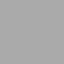

In [57]:
viewer = LavaVuModelViewer(model)
# viewer.add_scalar_field(s2['feature'][0],
#                        cmap='prism')
viewer.add_isosurface(s2['feature'][0])
viewer.add_data(s2['feature'][0])
viewer.rotate(rotation)
viewer.interactive()

### Modelling S1

In [7]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=3, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3
                                           )



INFO:LoopStructural.modelling.core.geological_model:Using last feature as fold frame
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding 0 faults to s1_0
INFO:LoopStructural.modelling.core.geological_model:Guess: 0.000000 0.000000 0.000000 3.000000
INFO:LoopStructural.modelling.core.geological_model:There are 0 nans for the fold limb rotation angle and 104 observations
INFO:LoopStructural.modelling.core.geological_model:Fitted: 0.000000 0.000000 0.000000 3.000000
INFO:LoopStructural.modelling.features.structural_frame_builder:Building s1 coordinate 0
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding fold to s1_0


cant fit


INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold orientation constraint to s1_0 w = 10.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold axis constraint to s1_0 w = 10.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold normalisation constraint to s1_0 w = 1.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold regularisation constraint to s1_0 w = 0.100000


(473200, 3, 4) (473200, 3) (473200, 4) (473200, 4)
473200


INFO:LoopStructural.interpolators.piecewiselinear_interpolator:Setting up PLI interpolator for s1_0
INFO:LoopStructural.interpolators.piecewiselinear_interpolator:Added 104 gradient constraints, 0 normal constraints,0 tangent constraints and 3 value constraintsto s1_0
INFO:LoopStructural.interpolators.discete_interpolator:Interpolation matrix is 2353419 x 101124
INFO:LoopStructural.interpolators.discete_interpolator:Solving with pyamg solve
Add some more and try again.
Add some more and try again.


INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s1_0 to viewer. Min: -0.523011, max: 1.468180



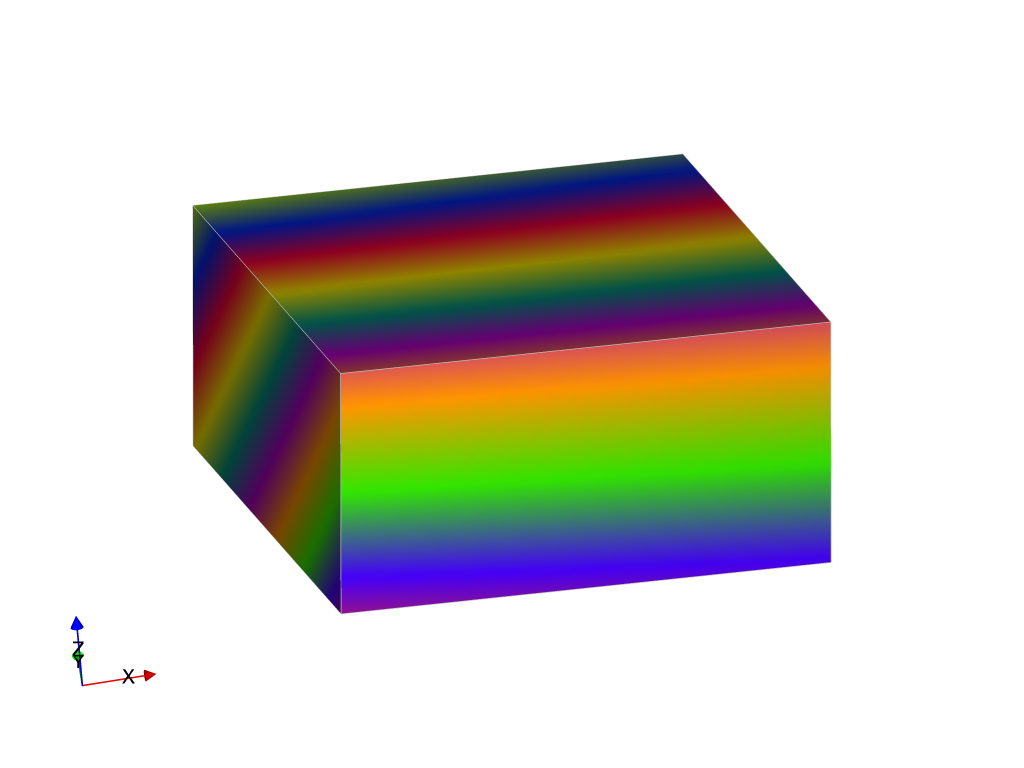

KeyError: 'limb_svariogram'

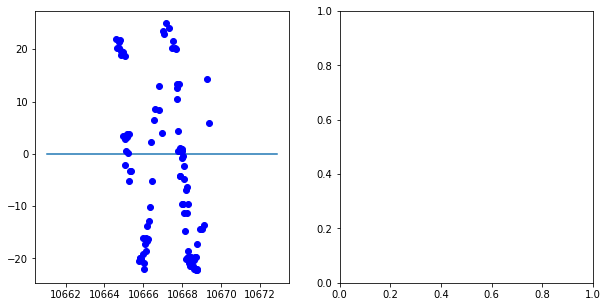

In [8]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['foliation'],s1['limb_rotation'],'bo')
ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

In [53]:
from LoopStructural.modelling.fold.fold_rotation_angle_feature import fourier_series
from scipy.optimize import curve_fit
guess = np.zeros(4)
guess[3] = 2.5
y = np.arctan(np.deg2rad((s1['limb_rotation'])))
x = s1['foliation']
x -= np.min(x)
popt, pcov = curve_fit(fourier_series,
                                   x,
                                   y, guess)

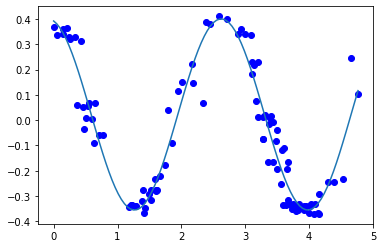

In [54]:
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(x,y,'bo')
plt.plot(xx,fourier_series(xx,popt[0],popt[1],popt[2],popt[3]))

[0.88456549 0.82283695 0.13885786 0.09729288 0.24683081 0.10544981
 0.73824668 0.08892491 0.25254131 0.0784459  0.84095579 0.60680793
 0.24769558 0.54557852 0.11524021 0.01768492 0.21933938 0.14915632
 0.35117308 0.19486929 0.14786083 0.99908279 0.97853186 0.78093733
 0.71760733 0.69028018 0.18480459 0.72961447 0.21379342 0.31460357
 0.4156776  0.63323675 0.76871597 0.95000553 0.82639393 0.76812683
 0.64952921 0.73542853 0.42100718 0.30959956 0.59177515 0.7819143
 0.55573153 0.57144743 0.90049879 0.97137555 0.45823454 0.51710473
 0.59817053 0.20690192 0.70995312 0.40171322 0.32953723 0.8038748
 0.60953477 0.23254527 0.36226311 0.17060648 0.31684935 0.1681194
 0.7503385  0.61017336 0.80491177 0.74624155 0.03507681 0.51648271
 0.96582476 0.4049549  0.66097447 0.04868957 0.99782555 0.24860943
 0.80846143 0.20059336 0.38923526 0.99277018 0.81542417 0.03142116
 0.74069135 0.73625412]
[ 0.00457222 -0.00100905  0.00420663  0.59259236]


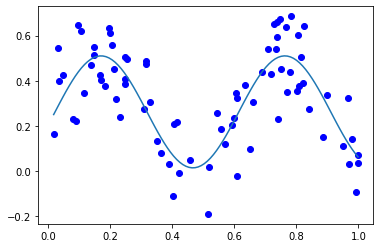

In [46]:
x = np.hstack([np.random.random(20),np.random.random(20),np.random.random(20),np.random.random(20)])
print(x)
s = np.hstack([np.random.random(20),np.random.random(20),np.random.random(20),np.random.random(20)]) / 2
y = np.sin(x*10)/4 + s
plt.plot(x,y,'bo')
popt, pcov = curve_fit(fourier_series,
                                   x,
                                   y)
print(popt)
xx = np.linspace(np.min(x),np.max(x),100)
plt.plot(xx,fourier_series(xx,popt[0],popt[1],popt[2],popt[3]))

### Modelling S0

In [ ]:
s0 = model.create_and_add_folded_fold_frame('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2
                                           )

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'][0],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')